In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.signal
import keras
import ipywidgets as widgets

from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from PIL import Image

# Introduction
For this project, we decided to work on an image classification problem using neural networks to solve multi-label classification. Initially, we began by researching different datasets and deciding on a dataset which was generic (not affiliated with any existing IPs) and contained multi-labels.

## The Data
We chose to work on creating a model to classify low-resolution game sprites. For this, we went with the [Pixel Art dataset by Ebrahim Elgazar](https://www.kaggle.com/datasets/ebrahimelgazar/pixel-art). This provides us with a set of 595 sprites to look at.

*For some reason, the original dataset is actually 89,000 images of the same 894 sprites. But, indices from 244 to 543 are downscaled images, so we didn't want to work on those. That leaves use with 595 sprites to work on*

In [5]:
data = np.load('./Dataset1/sprites_labels.npy')
sprites = np.load('./Dataset1/sprites.npy')

selected_labels = data[:894]
selected_labels = np.delete(selected_labels, slice(244, 543), axis=0)
print(selected_labels.shape)

selected_sprites = sprites[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0)
print(selected_sprites.shape)

The labels for said data are as follows:
[Character (Front), Monster, Food, Item, Character (Side)]
- Characters (0-159)
    - [1, 0, 0, 0 ,0] - Front Facing
    - [0, 0, 0, 0, 1] - Side Facing
- Monsters (160-183)
    - [0, 1, 0, 0, 0]
- Food (184-243)
    - [0, 0, 1, 0, 0]
- Downscaled Monsters - RED (244-343) *excluded*
    - [0, 1, 0, 0, 0]
- Downscaled Monsters - GREEN (344-443) *excluded*
    - [0, 1, 0, 0, 0]
- Downscaled Monsters - BLUE (444-543) *excluded*
    - [0, 1, 0, 0, 0]
- Items (544-893)
    - [0, 0, 0, 1, 0]

Conveniently, the labels are already in one-hot-encoding form.

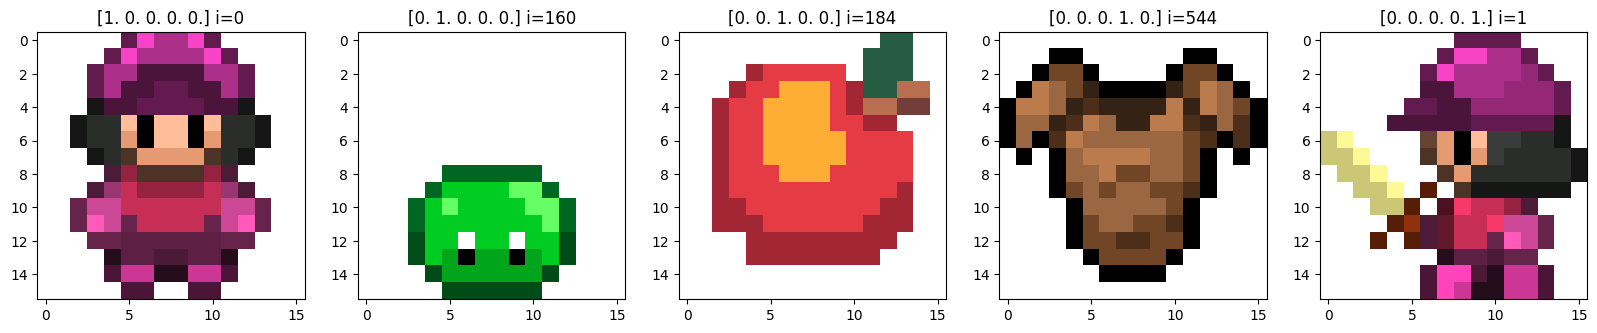

In [12]:
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
indices = [0, 160, 184, 544, 1]
for i in range(5):
    index = indices[i]
    ax[i].imshow(sprites[index])
    ax[i].set_title(f"{data[index]} i={index}")